In [46]:
from models import ml_racer_pred_dl
from models.preprocessing_racer_pred_dl import RacerPredDlPreprocessor
from raceresults import RaceResults
import raceresults
from tensorflow import keras
import pandas as pd
import datetime as dt
from sklearn.metrics import mean_squared_error

In [3]:
result_mana = RaceResults()
all_data = result_mana.get_results_pd()
preprosecessor = RacerPredDlPreprocessor()

In [33]:
all_data = all_data[all_data["DISTANCE"] == 1800]
sprit_date = dt.datetime(2019,12,25)
train_data = all_data[all_data['RACE_DATE'] < sprit_date]
test_data = all_data[all_data['RACE_DATE'] >= sprit_date]
"train_count: %i, test_count: %i" % (len(train_data), len(test_data))

'train_count: 91990, test_count: 15854'

In [34]:
preprosecessor.data_prepare(train_data, True)

In [35]:
_X, _y = preprosecessor.get_prepared_data()

In [36]:
X = _X.values
y = _y.values

In [37]:
model = ml_racer_pred_dl.build_model(x_data=_X)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                16000     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 16,341
Trainable params: 16,341
Non-trainable params: 0
_________________________________________________________________


In [39]:
EPOCHS = 100

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, y, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, ml_racer_pred_dl.PrintDot()])


................................

In [40]:
import matplotlib.pyplot as plt
import pathlib

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()

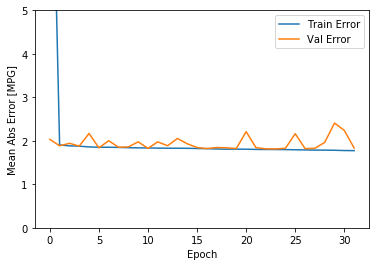

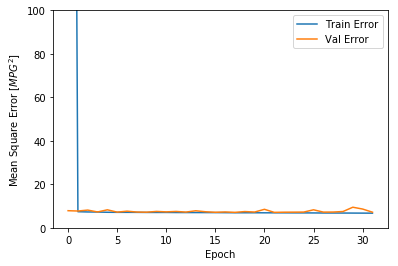

In [41]:
plot_history(history)

In [42]:
preprosecessor.data_prepare(test_data, False)
_test_X, _test_y = preprosecessor.get_prepared_data()

b = model.predict(_test_X.values)

In [48]:
mean_squared_error(test_data["RACE_TIME"], b)

7.530046388646746

In [49]:
model_2 = ml_racer_pred_dl.build_model(x_data=_X, learning_rate=0.0005)
EPOCHS_2 = 100

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model_2.fit(X, y, epochs=EPOCHS_2,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, ml_racer_pred_dl.PrintDot()])
b_2 = model_2.predict(_test_X.values)


...................................

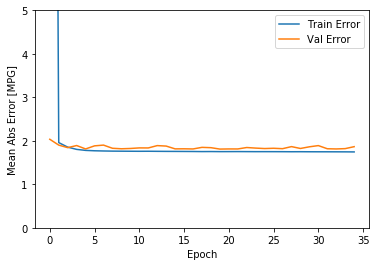

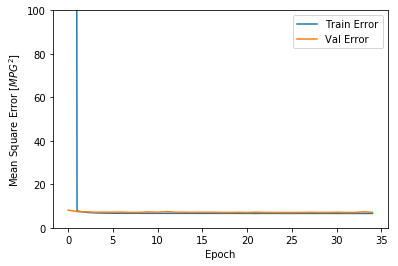

In [50]:
plot_history(history)

In [51]:
mean_squared_error(test_data["RACE_TIME"], b_2)

7.669453347282998